In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

pd.options.plotting.backend = "plotly"

In [14]:
## Load data

file = "..\..\Data\cykelstativ.csv"
df = pd.read_csv(file)

df = df[df["antal_pladser"] != 0]

df.columns
# df.head()

Index(['FID', 'id', 'vejkode', 'vejnavn', 'park_id', 'bydel', 'stativ_type',
       'stativ_placering', 'stativ_udformning', 'cykler_retning',
       'antal_pladser', 'stativ_tilstand', 'stativ_ejer', 'stativ_foto',
       'bemaerkning', 'reg_metode', 'reg_dato', 'rettet_dato', 'budget',
       'projekt', 'faerdigmelding', 'projektbeskrivelse', 'stativ_fjernet',
       'ogc_fid', 'wkb_geometry'],
      dtype='object')

### Basic plots - The fundamental distributions of the data

In [25]:
## Amount of spots in bike stands

print("Mean: ", np.mean(df["antal_pladser"]))
print("Minimum: ", np.min(df["antal_pladser"]))
print("Maximum: ", np.max(df["antal_pladser"]))

col = px.colors.qualitative.Dark2

fig = px.histogram(df, x="antal_pladser", title="Amount of spots in bike stands", color_discrete_sequence=[col[2]])
fig.update_layout(xaxis_title="Amount of spots", yaxis_title="Occurences")  
fig.show()

Mean:  12.25383110531464
Minimum:  1.0
Maximum:  296.0


In [32]:
## Owner of the different bike stands

stand_owner = df.groupby("stativ_ejer", observed=False).size()

fig = stand_owner.plot.bar(color_discrete_sequence=[col[2]], width=700, height=400)
fig.update_layout(title="Owner of the different bike stands", yaxis_title="Amount of bike stands", xaxis_title="Bike stand owner", showlegend=False)
fig.show()


In [16]:
## Bike stands divided into districts + Offentlig vs Privat

dist_amount = df.groupby("bydel", observed=False).size()

fig = dist_amount.plot.bar(color_discrete_sequence=[col[2]], width=700, height=400)
fig.update_layout(title="Bike stands divided into districts", yaxis_title="Amount of bike stands", xaxis_title="District", showlegend=False)
fig.show()

# With owner
stand_amount = df.groupby(['bydel', 'stativ_ejer']).size()

fig = px.bar(stand_amount.reset_index(), x='bydel', y=0, color='stativ_ejer', 
             title='Bike Stands Divided into Districts', 
             width=900, height=500, text_auto='.2s',
             color_discrete_sequence=[col[0], col[1], col[2]])
fig.update_layout(xaxis_title='District', yaxis_title='Amount of Bike Stands', legend_title='Owner', showlegend=True)
fig.show()

The plot (Bike Stands Divided into Districts) shows the distribution of bike stands in the different districts of Copenhagen. It can be seen, that there are four big categories; Indre By, Nørrebro, Vesterbro-Kongens Enghave and Østerbro, and six smaller categories with a total amount of bike stands below 500. The district with the most bike stands is Indre By with and the district with 1678 stands the less bike stands is Vanløse with 100 stands. 

Futhermore, we can see that the part of private stands vs. public stands are almost equal, but with some bike stands that are not registered. 

<div style="margin-left: auto;
            margin-right: auto;
            width: 80%">

| | Amager Vest | Amager Øst | Bispebjerg | Brønshøj-Husum | Indre By | Nørrebro | Valby | Vanløse | Vesterbro - Kongens Enghave | Østerbro | 
|--------|-----------|------------|-----------|----------|-----------|----------|--------|--------|--------|--------|
|  Offentlige  |   221  | 125      | 45    | 53   | 864    | 372   |91   |25   |456   | 506 |
|  Private     |   119  | 48     | 150   | 68   | 518    | 418   |111   |75   |438  | 818 |
|  Ikke registreret  |  32  | 76  | 0  | 0   | 296    | 4   |1   |0   |23   | 83 |



_Table X: Amount of public, private and not registred bike racks._
</div>

Amager Vest - ca. 59,4\% offentlige\
Amager Øst - ca. 50,2\% offentlige\
Bispebjerg - ca. 23,1\% offentlige\
Brønshøj-Husum - ca. 43,8\% offentlige\
Indre By - ca. 51,5\% offentlige\
Nørrebro - ca. 46,9\% offentlige\
Valby - ca. 44,8\% offentlige\
Vanløse - 25\% offentlige\
Vesterbro - Kongens Enghave - ca. 49,7\% offentlige\
Østerbro - ca. 36,0\% offentlige

In [14]:
## Bike stands divided into location + Offentlig vs Privat

place_amount = df.groupby("stativ_placering", observed=False).size()

fig = place_amount.plot.bar(color_discrete_sequence=[col[2]], width=700, height=400)
fig.update_layout(title="Location of bike stands", yaxis_title="Amount of bike stands", xaxis_title="Bike stand location", showlegend=False)
fig.show()

# With owner
place_amount_owner = df.groupby(['stativ_placering', 'stativ_ejer']).size()

fig = px.bar(place_amount_owner.reset_index(), x='stativ_placering', y=0, color='stativ_ejer', text_auto='.2s',
              title='Location of bike stands', width=900, height=500, color_discrete_sequence=[col[0], col[1], col[2]])
fig.update_layout(xaxis_title='Bike stand location', yaxis_title='Amount of Bike Stands', legend_title='Owner', showlegend=True)
fig.show()

Looking at the location of the bike stands, it can be seen that the most common place to locate a bike stand i copenhagen is at a facade, which is approximately 24% of the total amount of bike stands. Furthermore, it can be seen that 90.8% of the bike stands located at a facade are privately owned, which is not a surprise, since most buildings are privately owned and therefore the councils need permission to build place a bike stand at a facade. This is the same argue for the location 'tæt på facade', since it might be private lot close to the private buildings. 

On the other hand, we can see that the publicly owned bike stands are dominating for the rest of the categories. Specially the categories 'på fortov', 'på fortovsudvidelse' and 'på plads', where there is a high amount of public bike stands. In general pavements and squares are publicly owned in Copenhagen, so when a council wants to place a new bike stand, an easy place to locate the bike stand will be a pavement or a square. 

xxx\
Noget med at det giver mening at der ikke er så mange stativer på gadeareal\
xxx

In [22]:
## Bike stands divided into design + Offentlig vs Privat

stand_design = df.groupby("stativ_udformning", observed=False).size()

fig = stand_design.plot.bar(color_discrete_sequence=[col[2]], width=700, height=400)
fig.update_layout(title="Bike stands per different stand design", yaxis_title="Amount of bike stands", xaxis_title="Bike stand design", showlegend=False)
fig.show()


# With owner
stand_design_owner = df.groupby(['stativ_udformning', 'stativ_ejer']).size()

fig = px.bar(stand_design_owner.reset_index(), x='stativ_udformning', y=0, color='stativ_ejer', 
             title='Bike stands per different stand design', width=900, height=500, text_auto='.2s',
             color_discrete_sequence=[col[0], col[1], col[2]])
fig.update_layout(xaxis_title='Bike stand design', yaxis_title='Amount of bike stands', legend_title='Owner', showlegend=True)
fig.show()

From the plot [below/above] we can see that the most common design of the bike stands are the single-sided stands. With a total amount of the single-sided stands at 4830 the category can be divided into publicly owned, privately owend and not registred. Here we can see that the most frequent category is the privately owned with approximately 500 bike stands more than publicly owned.

xxx more? xxx

In [30]:
xx = df[df['stativ_udformning'] == 'Enkeltsidet']

print(f'Max: {max(xx["antal_pladser"])}, Min: {min(xx["antal_pladser"])}')
print(f'Mean: {np.mean(xx["antal_pladser"])}, Std: {np.std(xx["antal_pladser"])}')

Max: 240.0, Min: 1.0
Mean: 10.909260410192667, Std: 11.734443890188732


In [33]:
## Bike stands divided into stand type + Offentlig vs Privat

stand_design = df.groupby("stativ_type", observed=False).size()

fig = stand_design.plot.bar(color_discrete_sequence=[col[2]], width=700, height=400)
fig.update_layout(title="Bike stands per different stand type", yaxis_title="Amount of bike stands", xaxis_title="Bike stand type", showlegend=False)
fig.show()


# With owner
stand_design_owner = df.groupby(['stativ_type', 'stativ_ejer']).size()

fig = px.bar(stand_design_owner.reset_index(), x='stativ_type', y=0, color='stativ_ejer', title='Bike stands per different stand type', width=900, height=500)
fig.update_layout(xaxis_title='Bike stand type', yaxis_title='Amount of bike stands', legend_title='Owner', showlegend=True)
fig.show()

# 168 hours plot over number of bikes on the street

In [8]:
def get_weekday(date_column):
    # Get the weekday index (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
    weekday_index = date_column.dt.weekday
    
    # Get the weekday name from the index
    weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    weekday_names = [weekdays[index] for index in weekday_index]
    
    return weekday_names

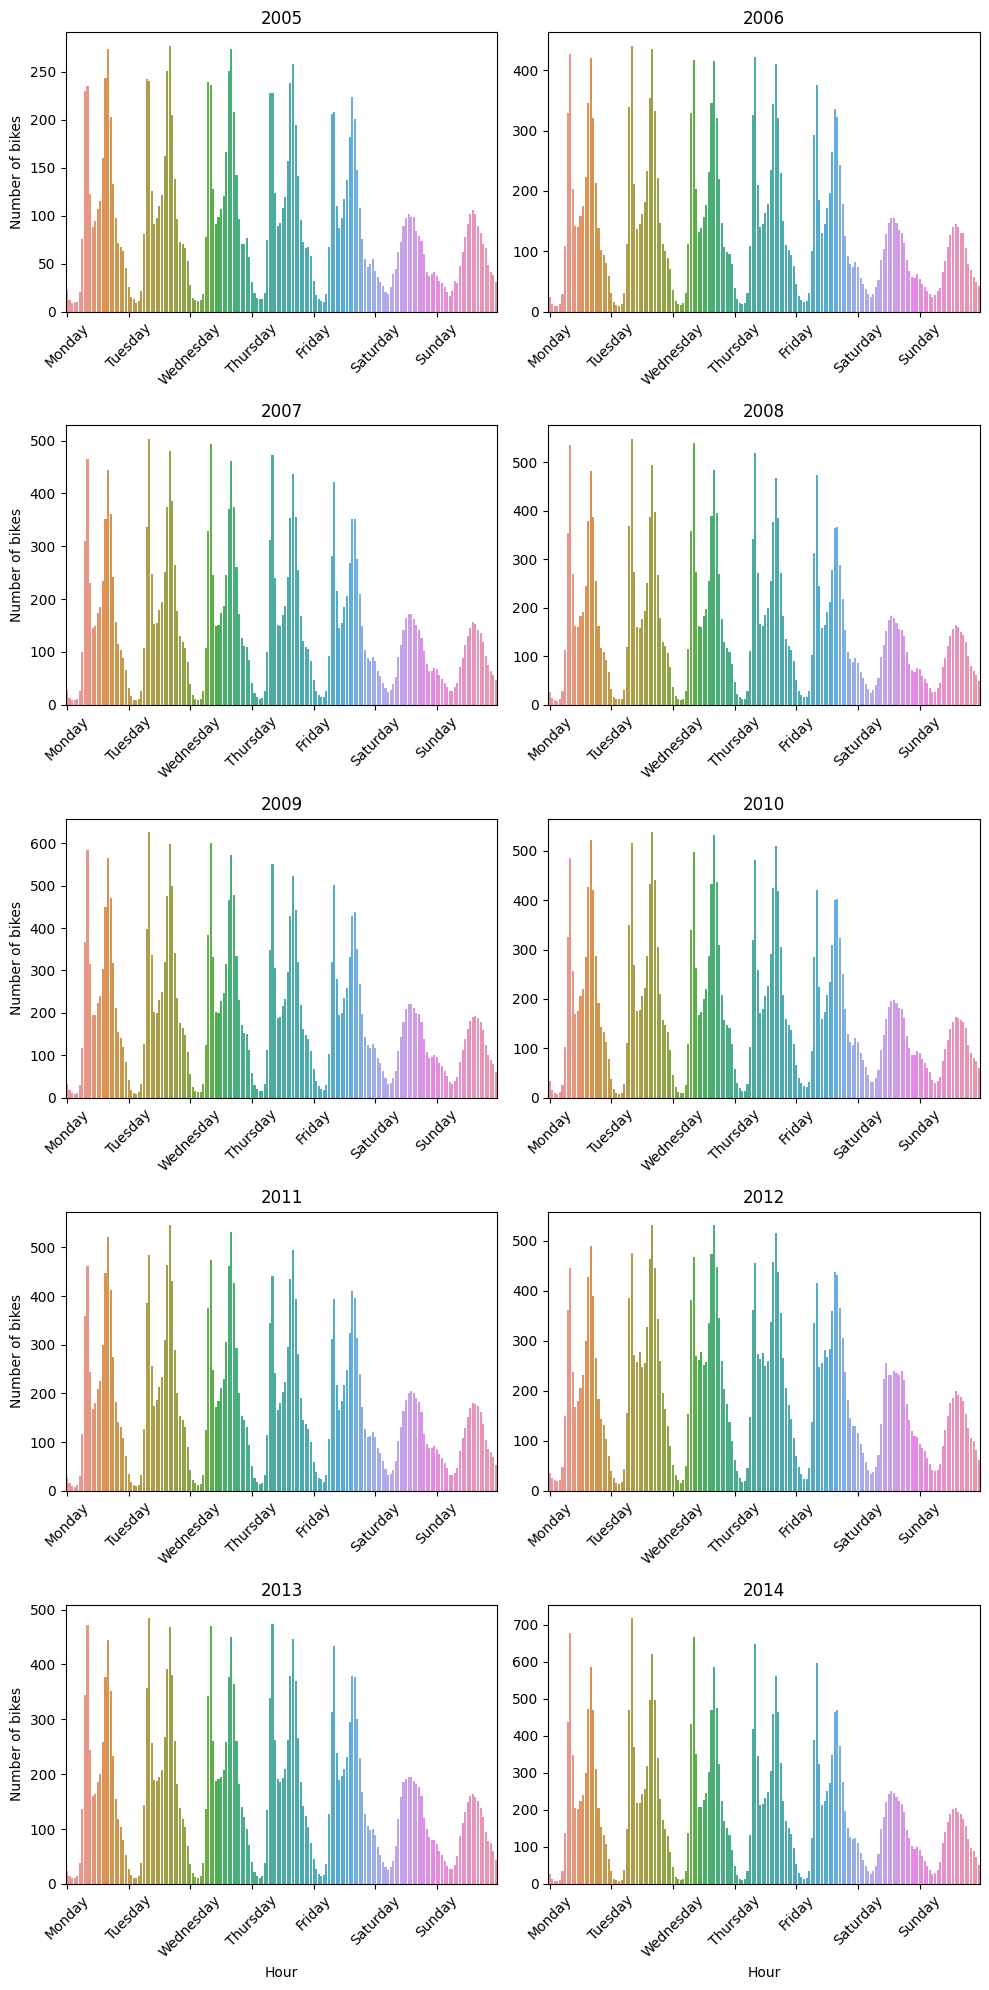

In [12]:
# List of file paths for the datasets
file_paths = ['..\..\Data\cykeltaellinger-2005.xlsx', '..\..\Data\cykeltaellinger-2006.xlsx', '..\..\Data\cykeltaellinger-2007.xlsx',
              '..\..\Data\cykeltaellinger-2008.xlsx', '..\..\Data\cykeltaellinger-2009.xlsx', '..\..\Data\cykeltaellinger-2010.xlsx',
              '..\..\Data\cykeltaellinger-2011.xlsx', '..\..\Data\cykeltaellinger-2012.xlsx', '..\..\Data\cykeltaellinger-2013.xlsx', '..\..\Data\cykeltaellinger-2014.xlsx']

# Define the number of rows and columns for the subplot
num_rows = 5
num_cols = 2

# Create a new figure and axis for the subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 20))

for i, file_path in enumerate(file_paths):
    # Extract the year from the file path
    year = file_path.split('-')[1].split('.')[0]
    # Read the dataset from Excel file
    data = pd.read_excel(file_path, usecols='A:AD', skiprows=10)

    data['Dato'] = pd.to_datetime(data['Dato'], format='%d.%m.%Y')
    data['weekdays'] = get_weekday(data['Dato'])
    
    # Reshape the DataFrame so that each timeslot becomes a separate row
    df = data.melt(id_vars=['Dato', 'weekdays'], value_vars=['kl.00-01', 'kl.01-02', 'kl.02-03', 'kl.03-04', 'kl.04-05',
                                                          'kl.05-06', 'kl.06-07', 'kl.07-08', 'kl.08-09', 'kl.09-10',
                                                          'kl.10-11', 'kl.11-12', 'kl.12-13', 'kl.13-14', 'kl.14-15',
                                                          'kl.15-16', 'kl.16-17', 'kl.17-18', 'kl.18-19', 'kl.19-20',
                                                          'kl.20-21', 'kl.21-22', 'kl.22-23', 'kl.23-24'],
                  var_name='Hour', value_name='Value')
    
    # Create a new column with the combined weekday and hour
    df['Weekday_Hour'] = df['weekdays'] + '_' + df['Hour']
    # print(df['Weekday_Hour'])
    
    # Define the order of weekdays and hours
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    hours = ['kl.00-01', 'kl.01-02', 'kl.02-03', 'kl.03-04', 'kl.04-05', 'kl.05-06', 'kl.06-07', 'kl.07-08', 'kl.08-09',
             'kl.09-10', 'kl.10-11', 'kl.11-12', 'kl.12-13', 'kl.13-14', 'kl.14-15', 'kl.15-16', 'kl.16-17', 'kl.17-18',
             'kl.18-19', 'kl.19-20', 'kl.20-21', 'kl.21-22', 'kl.22-23', 'kl.23-24']
    
    # Create a new column with the order of weekdays and hours
    df['Weekday_Hour'] = pd.Categorical(df['Weekday_Hour'], categories=[f'{weekday}_{hour}' for weekday in weekdays for hour in hours], ordered=True)
    
    # Sort the DataFrame based on the order of weekdays and hours
    df = df.sort_values('Weekday_Hour')
    
    # Plot the data on the corresponding subplot
    ax = axs[i // num_cols, i % num_cols]
    sns.barplot(data=df, x='Weekday_Hour', y='Value', ax=ax, ci=None)
    ax.set_title(year)

    if i % num_cols == 0:  # Check if the subplot is in the first column
        ax.set_ylabel('Number of bikes')
    else:
        ax.set_ylabel('')  # Set empty string for y-label for other subplots
    if i // num_cols == 4:
        ax.set_xlabel('Hour')
    else:
        ax.set_xlabel('')  # Set empty string for x-label for other subplots
    ax.set_xticks(range(0, 168, 24))  # Set ticks for weekdays
    ax.set_xticklabels(weekdays, rotation=45)  # Set labels for weekdays
    ax.set_ylim(0, None)  # Set y-axis limit to start from 0
    ax.grid(False)
    
# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()


Quick notes: 

It can clearly be seen when there is rush hour, and also that there are fewer that cycle during the weekend. more peolple during the night in the weekend compared to night in the weekdays.

# Monthly plot for each year

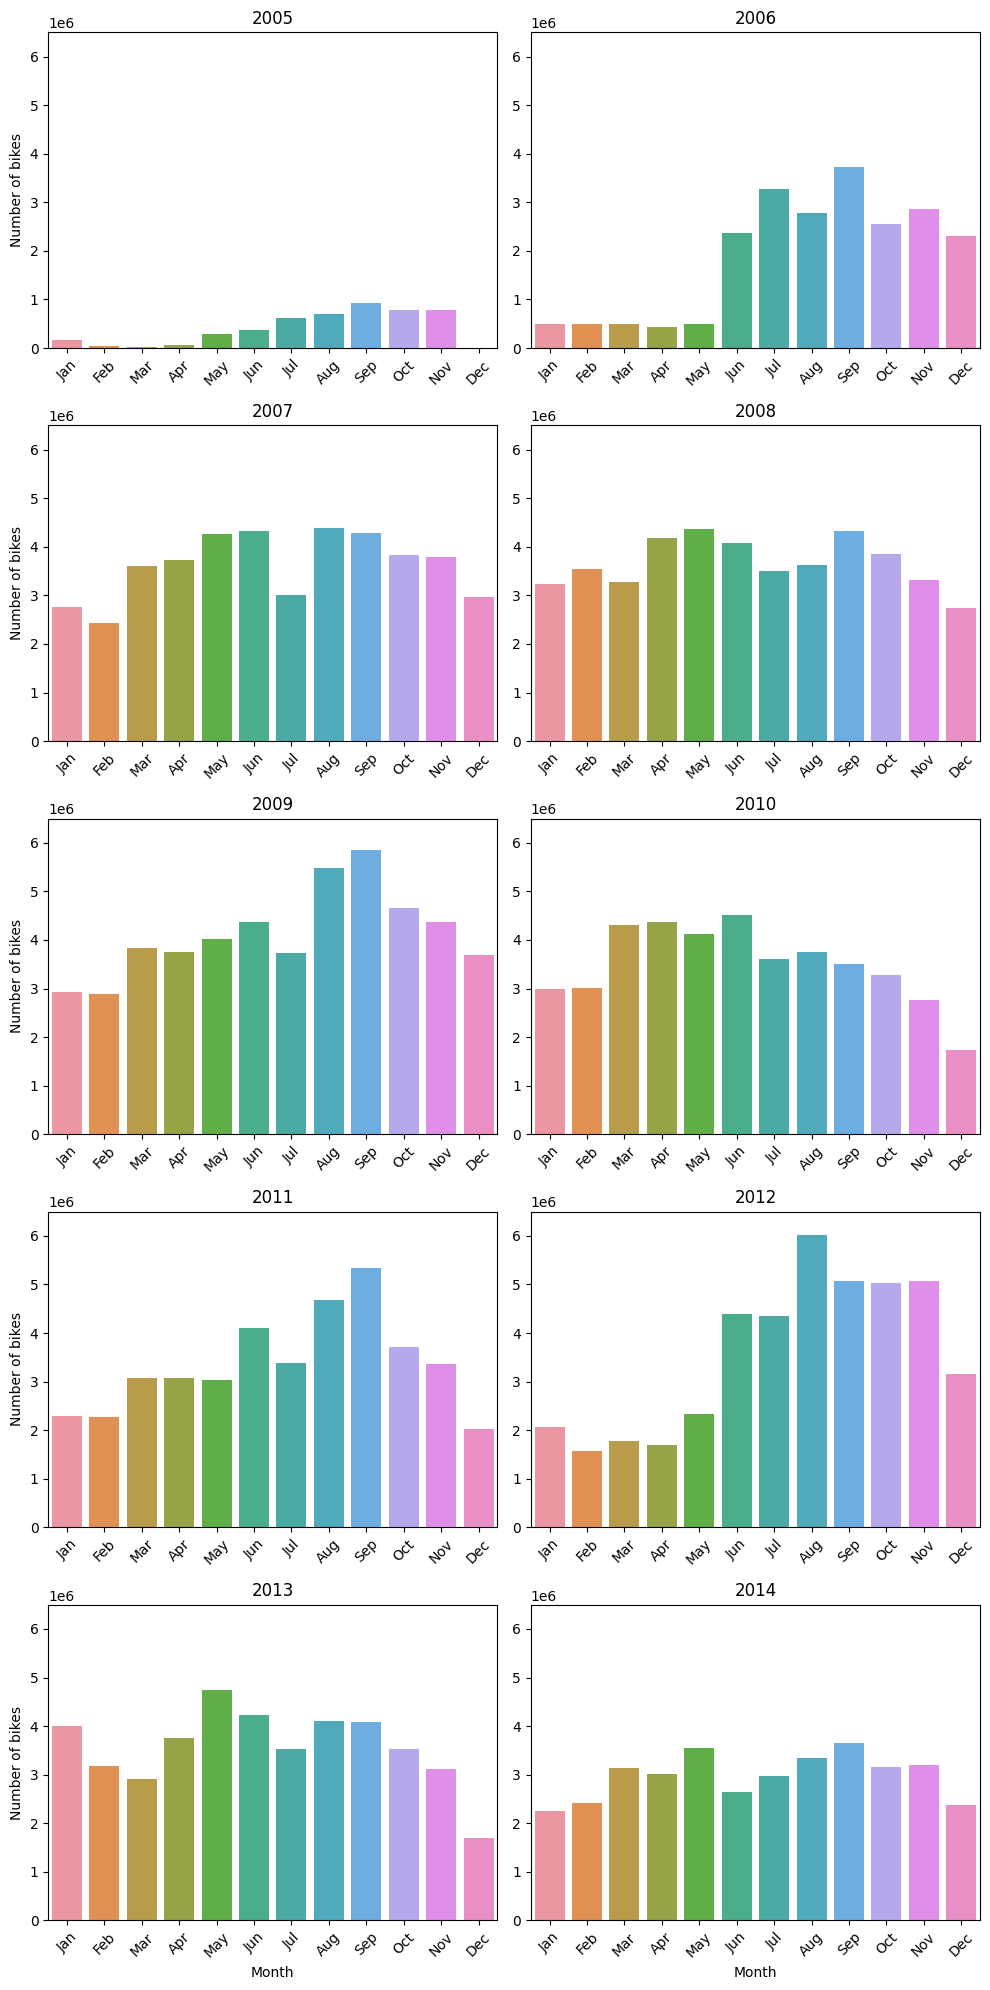

In [10]:

# List of file paths for the datasets
file_paths = ['..\..\Data\cykeltaellinger-2005.xlsx', '..\..\Data\cykeltaellinger-2006.xlsx', '..\..\Data\cykeltaellinger-2007.xlsx',
              '..\..\Data\cykeltaellinger-2008.xlsx', '..\..\Data\cykeltaellinger-2009.xlsx', '..\..\Data\cykeltaellinger-2010.xlsx',
              '..\..\Data\cykeltaellinger-2011.xlsx', '..\..\Data\cykeltaellinger-2012.xlsx', '..\..\Data\cykeltaellinger-2013.xlsx', '..\..\Data\cykeltaellinger-2014.xlsx']

# Define the number of rows and columns for the subplot
num_rows = 5
num_cols = 2

# Create a new figure and axis for the subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 20))

for i, file_path in enumerate(file_paths):
    # Extract the year from the file path
    year = file_path.split('-')[1].split('.')[0]
    # Read the dataset from Excel file
    data = pd.read_excel(file_path, usecols='A:AD', skiprows=10)

    data['Dato'] = pd.to_datetime(data['Dato'], format='%d.%m.%Y')

    # Sum the values across the time slots for each row
    data['Total_Value'] = data.iloc[:, 6:].sum(axis=1)
    
    # Extract the month from the 'Dato' column
    data['Month'] = data['Dato'].dt.month
    
    # Aggregate the data based on the month and sum the values
    monthly_data = data.groupby('Month').sum()
    
    # Ensure December has data, if not, append a row with zeros
    if 12 not in monthly_data.index:
        monthly_data.loc[12] = 0
    
    # Plot the data on the corresponding subplot
    ax = axs[i // num_cols, i % num_cols]
    sns.barplot(data=monthly_data, x=monthly_data.index, y='Total_Value', ax=ax, ci=None)
    ax.set_title(year)
    if i % num_cols == 0:  # Check if the subplot is in the first column
        ax.set_ylabel('Number of bikes')
    else:
        ax.set_ylabel('')  # Set empty string for y-label for other subplots
    if i // num_cols == 4:
        ax.set_xlabel('Month')
    else:
        ax.set_xlabel('')  # Set empty string for x-label for other subplots
    ax.set_xticks(range(0, 12))  # Set tick locations for all months
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)  # Set labels for months with rotation
    ax.set_ylim(0, 6.5e6)  # Set y-axis limit from 0 to 6 million
    ax.grid(False)  # Remove grid lines
    
# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()


### Part III

Starter med at holde fokus på Amager Vest

In [21]:
file = "..\..\Data\Befolkning.csv"
df_befolkning = pd.read_csv(file,sep=',',encoding='latin-1', header=1)

#delete last row of df_befolkning
df_befolkning = df_befolkning[:-1]

#sort by first collumn
df_befolkning = df_befolkning.sort_values(by=' ')

df_befolkning

,,2000K1,2001K1,2002K1,2002K2,2002K3,2002K4,2003K1,2003K2,2003K3,...,2021K4,2022K1,2022K2,2022K3,2022K4,2023K1,2023K2,2023K3,2023K4,2024K1
9,Bydel - Amager Vest,45397.0,45608.0,45695.0,45647.0,45523.0,45673.0,45631.0,45630.0,45409.0,...,83966.0,84561.0,85520.0,85505.0,86352.0,86668.0,87669.0,87226.0,88306.0,88380.0
8,Bydel - Amager Øst,47533.0,48196.0,48428.0,48449.0,48358.0,48357.0,48443.0,48492.0,48330.0,...,61455.0,61193.0,61411.0,61663.0,62101.0,62197.0,62718.0,62476.0,63068.0,62818.0
7,Bydel - Bispebjerg,44251.0,44641.0,45163.0,45217.0,45024.0,45141.0,44997.0,45084.0,44979.0,...,53934.0,53845.0,53957.0,54017.0,54239.0,54346.0,54758.0,54626.0,55044.0,54980.0
6,Bydel - Brønshøj-Husum,39657.0,39854.0,40008.0,39984.0,39923.0,40015.0,39989.0,40015.0,40060.0,...,44053.0,44005.0,43838.0,43803.0,43928.0,43933.0,43831.0,43690.0,44457.0,44467.0
0,Bydel - Indre By,43691.0,43978.0,44125.0,44168.0,44112.0,44307.0,44460.0,44512.0,44616.0,...,56413.0,56233.0,56601.0,56338.0,56813.0,56446.0,56838.0,56395.0,57153.0,56668.0
2,Bydel - Nørrebro,72993.0,73502.0,73865.0,73962.0,73813.0,74049.0,73836.0,73957.0,73529.0,...,78591.0,78588.0,78552.0,78402.0,78508.0,78583.0,78779.0,78962.0,79318.0,79067.0
4,Bydel - Valby,46209.0,46189.0,46271.0,46348.0,46264.0,46273.0,46211.0,46225.0,46145.0,...,63496.0,64144.0,64518.0,65176.0,65889.0,66435.0,66404.0,65877.0,65933.0,65780.0
5,Bydel - Vanløse,35822.0,36049.0,36233.0,36125.0,36069.0,36222.0,36228.0,36193.0,36146.0,...,40805.0,40781.0,40709.0,40598.0,40657.0,40633.0,40757.0,40710.0,40776.0,40709.0
3,Bydel - Vesterbro/Kongens Enghave,50312.0,50756.0,51037.0,51041.0,50878.0,50981.0,51035.0,51179.0,50921.0,...,77074.0,77283.0,77442.0,77704.0,78894.0,79646.0,80002.0,80363.0,81143.0,80920.0
1,Bydel - Østerbro,66673.0,66877.0,67017.0,67248.0,67095.0,67495.0,67554.0,67700.0,67630.0,...,79900.0,79952.0,80345.0,80356.0,80655.0,80605.0,80842.0,80779.0,81326.0,81278.0


In [100]:
## Bike racks / spots in Amager Vest
df_3 = df[df['bydel'] == 'Amager Vest']
print(f"Total amount of spots: {df_3['antal_pladser'].sum()}")

    ## Der er en del steder hvor datoen er NaN, men der er angivet et antal pladser (2066 rækker)

nan_count = df_3['reg_dato'].isna().sum()
extra_spots = df_3[df_3['reg_dato'].isna()]['antal_pladser'].sum()
print(f"Total amount of spots without date: {extra_spots}")

## Frasorterer NaN værdier
dato_3 = df_3.groupby('reg_dato')['antal_pladser'].sum()
dato_3.index = dato_3.index.str[:7]
print(f"Total amount of spots with date: {dato_3.sum()}")


## Make the accumulated sum
dato_3.values[0] += extra_spots #NOTE extra spots as start?
accum_sum = dato_3.cumsum()

accum_sum

Total amount of spots: 4109.0
Total amount of spots without date: 1286.0
Total amount of spots with date: 2823.0


reg_dato
2001-07    1315.0
2001-07    1330.0
2001-07    1422.0
2001-08    1458.0
2001-08    1473.0
2001-08    1491.0
2001-08    1531.0
2002-11    1541.0
2002-11    1552.0
2002-11    1562.0
2009-06    1866.0
2013-03    1886.0
2014-07    1931.0
2014-08    2171.0
2015-03    2176.0
2015-03    2181.0
2015-03    2186.0
2015-03    2191.0
2015-05    2196.0
2015-05    2216.0
2015-05    2226.0
2015-05    2304.0
2016-03    2419.0
2016-03    2424.0
2017-01    3053.0
2017-02    3470.0
2017-02    3494.0
2017-02    3518.0
2017-02    3526.0
2017-04    3551.0
2017-05    3555.0
2017-05    3559.0
2017-05    3563.0
2017-05    3567.0
2017-10    3575.0
2017-11    3607.0
2017-12    3655.0
2017-12    3657.0
2018-07    3677.0
2018-07    3687.0
2018-07    3707.0
2019-08    3807.0
2019-08    3837.0
2021-09    3867.0
2022-10    3881.0
2024-01    3941.0
2024-01    4109.0
Name: antal_pladser, dtype: float64

In [102]:
## Population in Amager Vest

df_befolkning_3 = df_befolkning.iloc[0]
for i in range(1,5):
    if df_befolkning_3.index.str[5] == str(i):
    
df_befolkning_3.index.str[5]


Index([nan, '1', '1', '1', '2', '3', '4', '1', '2', '3', '4', '1', '2', '3',
       '4', '1', '2', '3', '4', '1', '2', '3', '4', '1', '2', '3', '4', '1',
       '2', '3', '4', '1', '2', '3', '4', '1', '2', '3', '4', '1', '2', '3',
       '4', '1', '2', '3', '4', '1', '2', '3', '4', '1', '2', '3', '4', '1',
       '2', '3', '4', '1', '2', '3', '4', '1', '2', '3', '4', '1', '2', '3',
       '4', '1', '2', '3', '4', '1', '2', '3', '4', '1', '2', '3', '4', '1',
       '2', '3', '4', '1', '2', '3', '4', '1'],
      dtype='object')

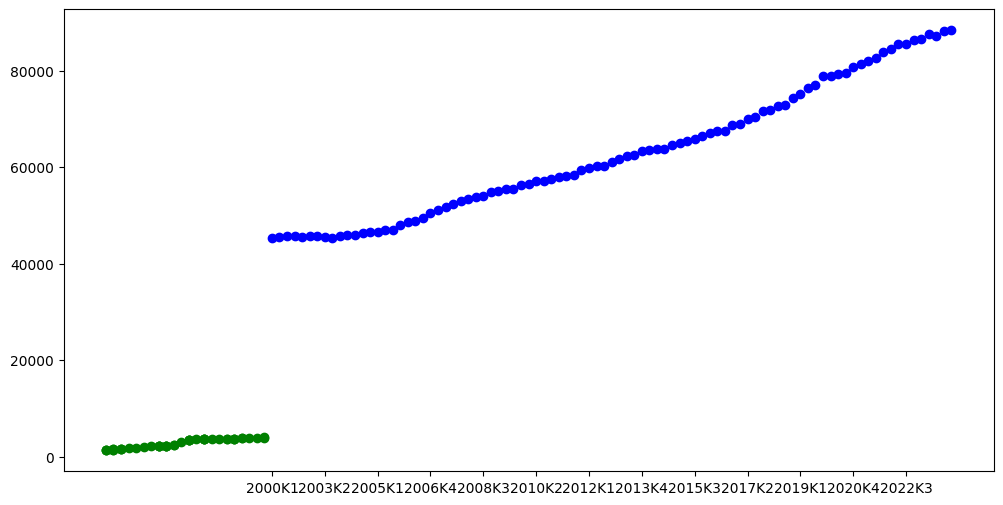

In [99]:
## Plotting

# plt.scatter(df_befolkning_3.index[1:], df_befolkning_3.values[1:], figure=plt.figure(figsize=(12, 6)))
# step = 20 # x-axis, step size
# plt.xticks(df_befolkning_3.index[::step])
# plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(accum_sum.index, accum_sum.values, color='green')
ax.scatter(df_befolkning_3.index[1:], df_befolkning_3.values[1:], color='blue')
step = 7 # x-axis, step size
plt.xticks(df_befolkning_3.index[1::step])
plt.show()